# **Laboratorio 3**

In [202]:
# IMPORTAMOS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## **1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera: Crear un data frame de pandas con los siguientes datos:**

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [203]:
# Creamos un diccionario con los datos
data_dict = {
    'train': [0, 1, 2, 3, 4, 5],
    'X': [0, 1, 2, 3, 4, 5],
    'y': [0, 1, 2, 3, 4, 5]
    }

df = pd.DataFrame(data_dict) # Creamos un dataframe a partir de estos datos
df.head()

,train,X,y
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4



## **2. Crear una función para calcular la función de coste.**

In [207]:
def predictor(df, the):
    
    h = the[0] + the[1]*df.X # Retornamos el predictor
    
    return h

def J(df, the):
    
    h = predictor(df, the) # Definimos el predictor
    m = len(df.X) # Tamaño de datos
    sum = np.sum( (h - df.y)**2 ) # Realizamos la suma (o promedio)
    
    return sum / (2*m) # Retornamos el valor de la función de coste

the = [0.2, 0.7]

J(df, the)

0.2825

## **3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.**

In [208]:
thetas = np.linspace(0, 1)
J_t = [J(df, [0, t]) for t in thetas]

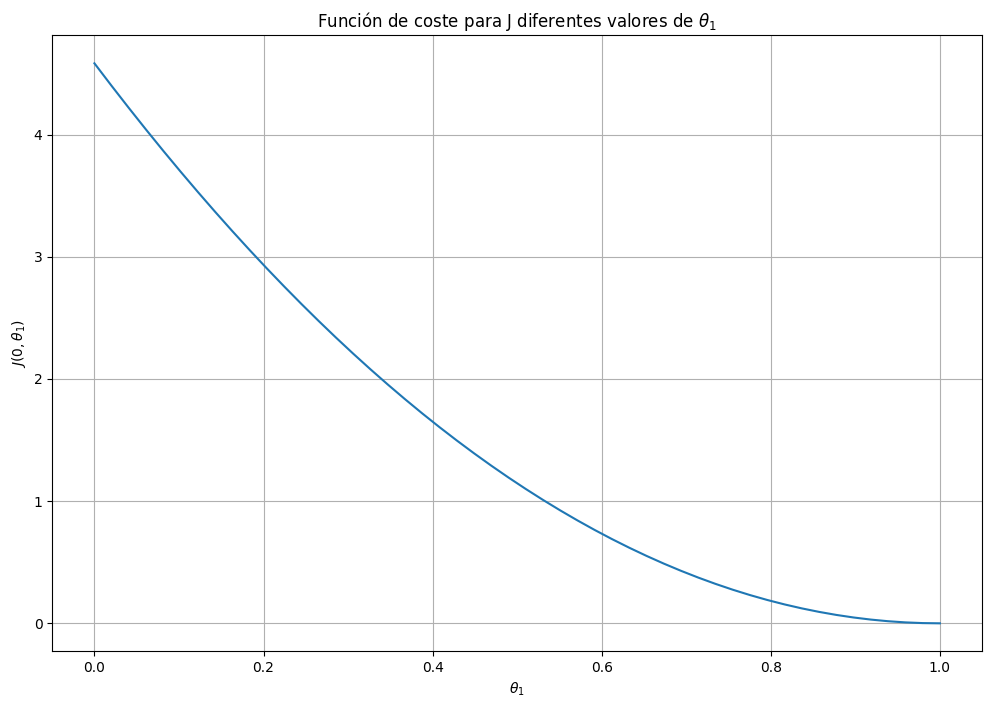

In [209]:
plt.figure(figsize=(12, 8))
plt.plot(thetas, J_t)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(0, \\theta_1)$")
plt.title("Función de coste para J diferentes valores de $\\theta_1$")
plt.grid()
plt.show()

## **4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:**

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

**Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.**

**Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código**

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


**En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.**

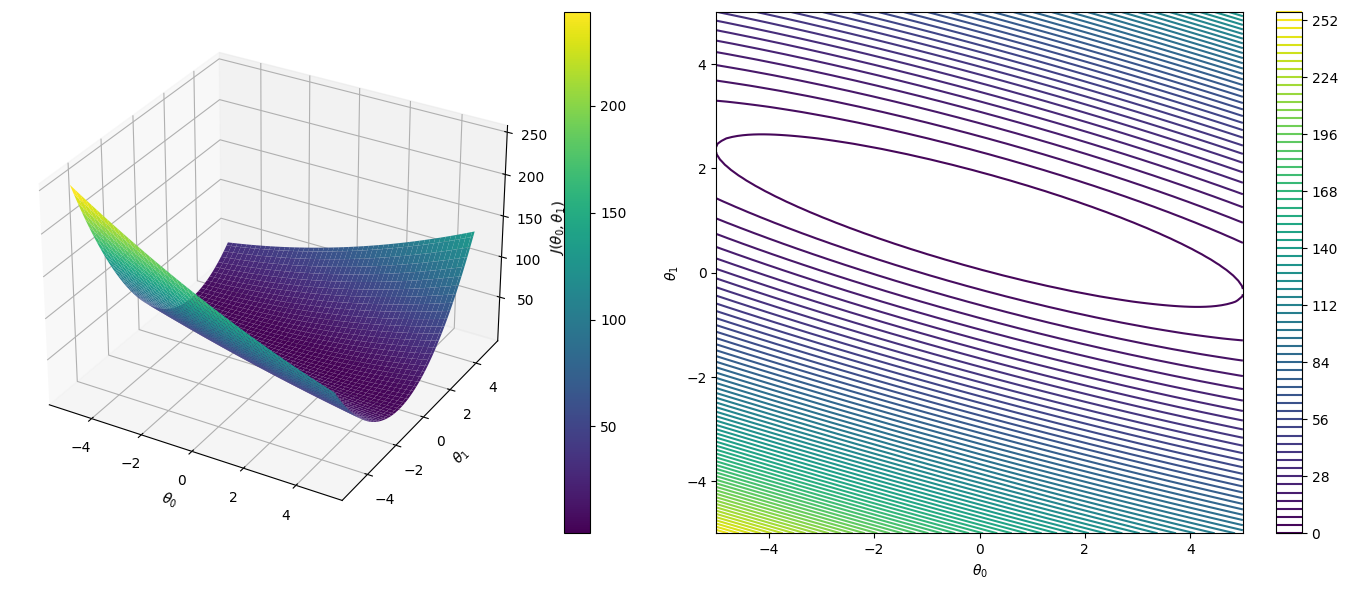

In [ ]:
#  Creamos la malla con el rango de valores para θ₀ y θ₁
Theta0, Theta1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Calculamos J para cada par (θ₀, θ₁)
J_vals = np.zeros_like(Theta0)

for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        J_vals[i, j] = J(df, [Theta0[i, j], Theta1[i, j]])

# Comenzamos la graficación
fig = plt.figure(figsize=(14, 6))

# Graficamos la superficie
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Theta0, Theta1, J_vals, cmap='viridis')
ax1.set_xlabel("$\\theta_0$")
ax1.set_ylabel("$\\theta_1$")
ax1.set_zlabel("$J(\\theta_0, \\theta_1)$")
fig.colorbar(surf, ax=ax1)

# Graficamos el contorno
ax2 = fig.add_subplot(122)
cont = ax2.contour(Theta0, Theta1, J_vals, levels=80, linestyles="solid")
ax2.set_xlabel("$\\theta_0$")
ax2.set_ylabel("$\\theta_1$")
fig.colorbar(cont, ax=ax2)

# Mostramos las gráficas
plt.tight_layout()
plt.show()

## **5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.**

La función de coste, se define así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para el caso 1D, sólo hay una característica $X_1$ y los parámetros a optimizar son 2. Por lo tanto, podemos definir el predictor como $h(X_1) = \theta_0 + \theta_1 X_1$, entonces la función de coste 1D tiene esta forma explícita:

\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m (\theta_0 + \theta_1X_1^{(i)}-y^{(i)})^2
\tag{2}
\end{equation}

Análogamente, si nuestro modelo cuenta con dos características $X_1$, $X_2$, entonces podemos definir al predictor como $h(X_1) = \theta_0 + \theta_1 X_1 + \theta_2X_2$, por lo que la función de coste 2D queda así:

\begin{equation}
J(\theta_0, \theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m (\theta_0 + \theta_1X_1^{(i)} + \theta_2X_2^{(i)} - y^{(i)})^2
\tag{3}
\end{equation}

Podemos llegar a una expresión teórica aún más simple si hacemos las siguientes asignaciones

\begin{equation}
\boldsymbol{\Theta}=
\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2 \\
.\\
.\\
.\\
\theta_m\\
\end{bmatrix}, ~~~~~~~~~

\boldsymbol{X}=
\begin{bmatrix}
1\\
X_1\\
X_2 \\
.\\
.\\
.\\
X_m\\
\end{bmatrix}
\tag{4}
\end{equation}

Entonces:

\begin{equation}
J(\boldsymbol{\Theta})=\frac{1}{2m} \sum_{i=0}^m (\boldsymbol{\Theta}\cdot\boldsymbol{X}^{(i)} - y^{(i)})^2
\tag{5}
\end{equation}

## **6. Construya un algoritmo en el que emplee el gradiente descente para determinar el mínimo de una función, determine el mínimo con un error $\epsilon$ de  $10^{-4}$, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$**

In [215]:
# Definimos la función y su derivada
def f(x):
    return (x - 4)**2

def fprime(x):
    return 2 * (x - 4)


# Definimos la función que encuentra el mínimo con el descenso del gradiente
def findMin(f, fprime, W, a, s = 0):

    x_var = W[s]
    minimo = f(W[s])
    for i in range(len(W)-1):
        W[i+1] = W[i] - a * fprime(W[i])
        if f(W[i+1]) < f(W[i]):
            minimo = f(W[i+1])
            x_var = W[i+1]

    return minimo, x_var

In [218]:
W = np.arange(-1, 1, 1e-4) # Construimos un array con todos los pesos (en este caso, valores de x)
learning_rate = 0.01 # Definimos un learning rate
minimo, x_var = findMin(f, fprime, W, a = learning_rate) # Calculamos el mínimo, tanto en rango como dominio

print(f"El mínimo de la función es {round(minimo)} y se da en el valor x = {round(x_var)}")

El mínimo de la función es 0 y se da en el valor x = 4


## **7.Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente:**

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  - Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.


**Para responder este punto puede consultar la siguiente  página y seguir el video** [ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg)

https://en.wikipedia.org/wiki/Gradient_descent

Punto inicial: [-1.24242424 -2.93939394]
Punto final: [-3.63560901 -4.42557903]
Valor mínimo aproximado: F = -1.000000 en (x, y) = (-3.6356, -4.4256)


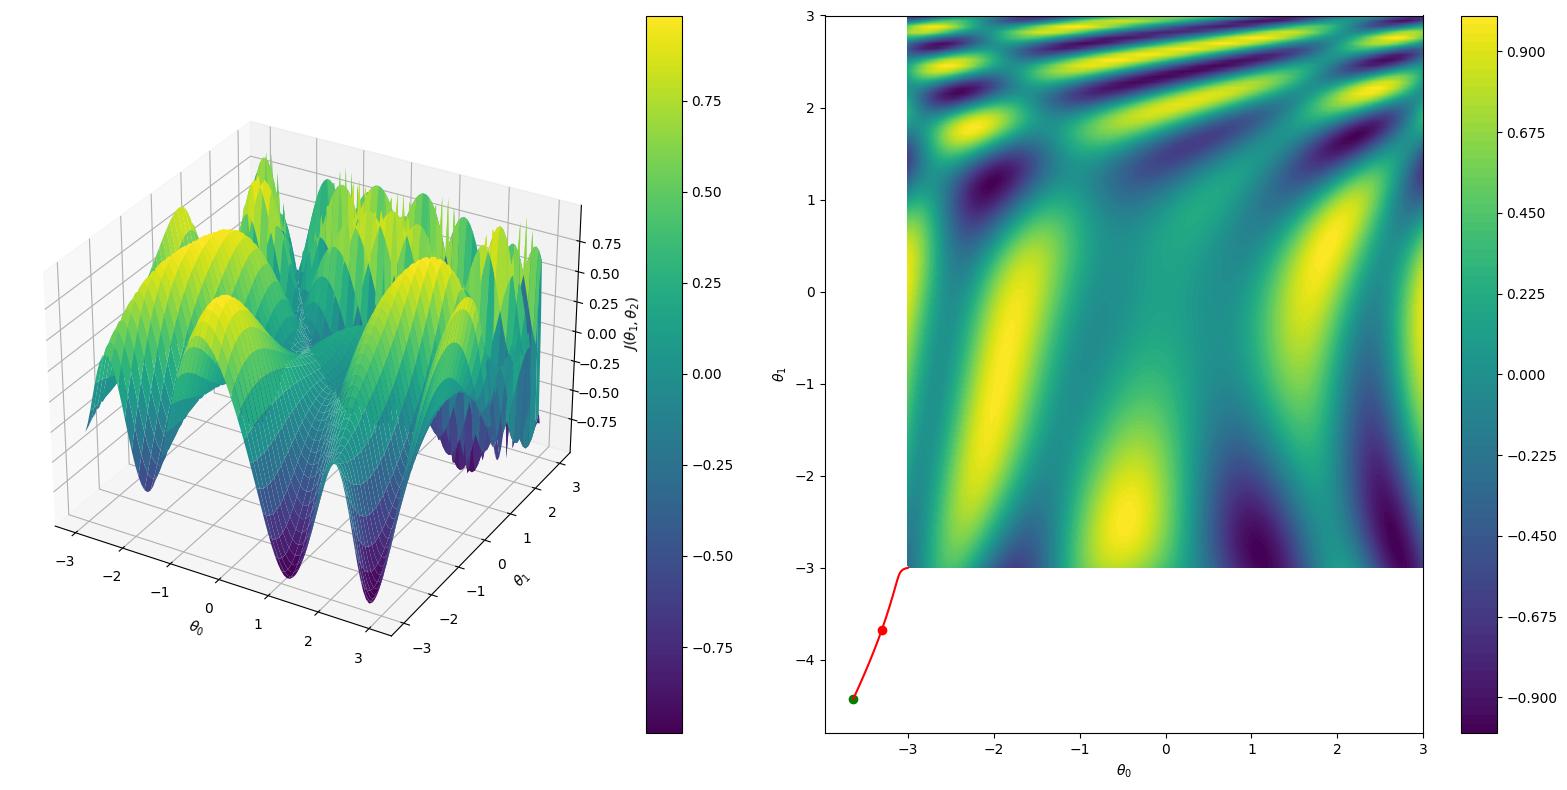

In [220]:
# Definimos la función en términos de x, y
def F(coords):
    
    x, y = coords
    
    term1 = np.sin(0.5 * x**2 - 0.25 * y**2 + 3)
    term2 = np.cos(2 * x + 1 - np.exp(y))

    return term1*term2

# Definimos el gradiente en términos de x, y
def gradF(coords):
    
    x, y = coords

    A = 0.5 * x**2 - 0.25 * y**2 + 3
    B = 2 * x + 1 - np.exp(y)

    # derivadas parciales
    dFdx = x * np.cos(A) * np.cos(B) - 2 * np.sin(A) * np.sin(B)
    dFdy = -0.5 * y * np.cos(A) * np.cos(B) + np.exp(y) * np.sin(A) * np.sin(B)
    return np.array([dFdx, dFdy])


# Definimos la malla del dominio 2D
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# Calculamos F para cada par (θ₀, θ₁)
F_vals = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        F_vals[i, j] = F([x[i, j], y[i, j]])

# Obtenemos el array con cada par de puntos en la mala
W_ = np.column_stack((x.ravel(), y.ravel()))
s_ = 129 # Elegimos la posición inicial, dentro de la malla

# Mostramos información relevante
print(f"Punto inicial: {W_[s_]}")
print(f"Punto final: {x_var}")

min_value, x_var = findMin(F, gradF, W_, a = learning_rate, s = s_)
print(f"Valor mínimo aproximado: F = {min_value:.6f} en (x, y) = ({x_var[0]:.4f}, {x_var[1]:.4f})")

# Empezamos a graficar
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x, y, F_vals, cmap='viridis')
ax1.set_xlabel("$\\theta_0$")
ax1.set_ylabel("$\\theta_1$")
ax1.set_zlabel("$J(\\theta_1, \\theta_2)$")
fig.colorbar(surf, ax=ax1)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(x, y, F_vals, levels=80, linestyles="solid")
ax2.scatter(W_[s_][0], W_[s_][1], color='red')
ax2.scatter(x_var[0], x_var[1], color='green')
ax2.set_xlabel("$\\theta_0$")
ax2.set_ylabel("$\\theta_1$")
fig.colorbar(cont, ax=ax2)

plt.plot(W_[:,0], W_[:,1], 'r-')

plt.tight_layout()
plt.show()

## **8. Empleando los siguientes datos, y las herramientas desarrolladas en los apartados anteriores, construya un algorítmo que permita determinar una regresión lineal:**

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

In [221]:
np.random.seed(0) # Definimos una semilla

# Construimos los datos y los convertimos a un dataframe
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

df_dict = {'X': X,
           'y': y}

df_sintetico = pd.DataFrame(df_dict)

In [222]:
J(df_sintetico, the=[0.2, 0.9]) # Cálculo de prueba con estos datos

0.07912859825563777

In [223]:
# Definimos el gradiente de la función de coste
def gradJ(df, the):
    """Gradiente de J: [∂J/∂θ0, ∂J/∂θ1]"""
    h = the[0] + the[1] * df.X
    m = len(df.y)
    d0 = np.sum(h - df.y) / m
    d1 = np.sum((h - df.y) * df.X) / m
    return np.array([d0, d1])

# Adaptamos la función del descenso del gradiente para este caso
def findMin(df, f, fprime, W, a, s = 0):

    x_var = W[s]
    minimo = f(df, W[s])
    for i in range(len(W)-1):
        W[i+1] = W[i] - a * fprime(df, W[i])
        if f(df, W[i+1]) < f(df, W[i]):
            minimo = f(df, W[i+1])
            x_var = W[i+1]

    return minimo, x_var

In [224]:
n_iters = 1000 # Establecemos un máximo de iteraciones en el descenso del gradiente
thetas  = np.zeros((n_iters+1, 2)) # Creamos un array que contenga la información de los pesos
# Calculamos mínimo y variables del dominio respectivas
minimo, x_var = findMin(df_sintetico, J, gradJ, thetas, a = learning_rate)

In [229]:
# Exploramos el resultado final
theta_opt = x_var
print(f"θ0 = {theta_opt[0]:.4f}, θ1 = {theta_opt[1]:.4f}")
print(f"Costo inicial J = {J(df, thetas[0]):.6f}")
print(f"Costo final   J = {J(df, theta_opt):.6f}")

# (Opcional) si se desea ver la historia de costos:
cost_history = [J(df, t) for t in thetas]


θ0 = 0.2293, θ1 = 0.1627
Costo inicial J = 4.583333
Costo final   J = 2.759854


In [230]:
h_op = predictor(df_sintetico, theta_opt) # Calculamos el predictor con estos pesos óptimos

In [1]:
# Graficamos los resultados de la regresión lineal manual 

# plt.figure(figsize=(12, 8))
# plt.scatter(df_sintetico.X, df_sintetico.y)
# plt.plot(df_sintetico.X, h_op, 'r-')
# plt.xlabel("$X$")
# plt.ylabel("$y$")
# plt.title("Regresión Lineal manual")
# plt.grid()
# plt.show()

## **9. Compare su resultado empleando la libreria linearRegresion() de sklearn.**

Manual GD:      θ0 = 0.2293, θ1 = 0.1627
sklearn LR:     θ0 = 0.2120, θ1 = 0.1950


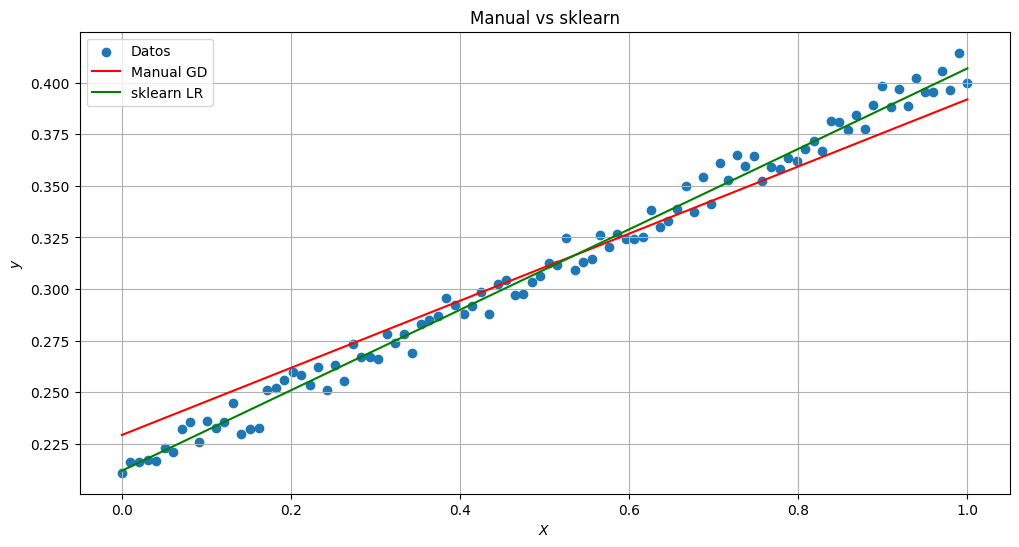

In [247]:
from sklearn.linear_model import LinearRegression

# # Resultados manuales obtenidos anteriormente
# theta_opt

# Ajuste con sklearn
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
w_sklearn = np.array([model.intercept_, model.coef_[0]])

# Impresión de coeficientes
print(f"Manual GD:      θ0 = {theta_opt[0]:.4f}, θ1 = {theta_opt[1]:.4f}")
print(f"sklearn LR:     θ0 = {w_sklearn[0]:.4f}, θ1 = {w_sklearn[1]:.4f}")

# Gráfico de comparación
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Datos")
plt.plot(X, theta_opt[0] + theta_opt[1] * X, 'r-', label="Manual GD")
plt.plot(X, w_sklearn[0] + w_sklearn[1] * X, 'g-', label="sklearn LR")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.title("Manual vs sklearn")
plt.legend()
plt.grid()
plt.show()